In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
emission_goals = pd.read_csv('../clean_data/emission_goals.csv')
emission_goals

,country,2030,2040,2050,1965.0_all_energy,1966.0_all_energy,1967.0_all_energy,1968.0_all_energy,1969.0_all_energy,1970.0_all_energy,...,2010.0_co2_emission,2011.0_co2_emission,2012.0_co2_emission,2013.0_co2_emission,2014.0_co2_emission,2015.0_co2_emission,2016.0_co2_emission,2017.0_co2_emission,2018.0_co2_emission,2019.0_co2_emission
0,Global,50-125,5-25,<0,155.690938,164.097213,170.274511,180.646875,192.857279,205.007079,...,31085.534841,31973.369818,32273.531532,32795.554106,32804.718691,32787.197673,32936.066036,33279.491334,34007.891035,34169.000782
1,US,30-130,0-32,<0,52.433795,55.383038,57.311776,60.799094,64.049612,66.215508,...,5485.715925,5336.435925,5089.974540,5249.595898,5254.565096,5141.406746,5042.431426,4983.869718,5116.785715,4964.693088
2,EU,75-80,0-5,<0,42.093184,43.282622,44.509488,47.391263,50.927589,54.195380,...,3922.934995,3800.361504,3737.698716,3653.468215,3445.591925,3486.935193,3498.502547,3527.146451,3466.482504,3330.444758
3,Brazil,0-20,<0,<0,0.969469,1.057605,1.095653,1.252840,1.367832,1.585817,...,398.324213,423.761618,442.858031,482.871255,503.779772,487.040178,450.367978,457.229289,442.250684,441.299916
4,India,115-155,5,<0,2.217659,2.285377,2.355911,2.517670,2.790898,2.729549,...,1660.654080,1735.150560,1848.132873,1929.353035,2083.540801,2149.379180,2242.892441,2329.816567,2452.501157,2480.354461
5,China,100-110,0-5,<0,5.516043,5.995001,5.391341,5.445350,6.627664,8.486606,...,8143.438769,8824.313535,9001.257445,9244.003274,9239.855878,9185.990809,9137.626592,9297.988543,9507.109644,9825.801775
6,South Africa,45-377,5-10,<0,1.275199,1.283121,1.336141,1.410133,1.451920,1.517304,...,476.665493,467.761278,463.782634,464.160481,469.114585,451.706682,470.509701,465.805487,470.377753,478.823071
7,Indonesia,50-255,5-30,<0,0.303080,0.300495,0.296711,0.316207,0.357009,0.382341,...,428.016230,480.059094,513.002788,532.869390,486.137994,497.934985,501.997264,526.971609,580.719627,632.085380


In [3]:
list(emission_goals.columns)

['country',
 '2030',
 '2040',
 '2050',
 '1965.0_all_energy',
 '1966.0_all_energy',
 '1967.0_all_energy',
 '1968.0_all_energy',
 '1969.0_all_energy',
 '1970.0_all_energy',
 '1971.0_all_energy',
 '1972.0_all_energy',
 '1973.0_all_energy',
 '1974.0_all_energy',
 '1975.0_all_energy',
 '1976.0_all_energy',
 '1977.0_all_energy',
 '1978.0_all_energy',
 '1979.0_all_energy',
 '1980.0_all_energy',
 '1981.0_all_energy',
 '1982.0_all_energy',
 '1983.0_all_energy',
 '1984.0_all_energy',
 '1985.0_all_energy',
 '1986.0_all_energy',
 '1987.0_all_energy',
 '1988.0_all_energy',
 '1989.0_all_energy',
 '1990.0_all_energy',
 '1991.0_all_energy',
 '1992.0_all_energy',
 '1993.0_all_energy',
 '1994.0_all_energy',
 '1995.0_all_energy',
 '1996.0_all_energy',
 '1997.0_all_energy',
 '1998.0_all_energy',
 '1999.0_all_energy',
 '2000.0_all_energy',
 '2001.0_all_energy',
 '2002.0_all_energy',
 '2003.0_all_energy',
 '2004.0_all_energy',
 '2005.0_all_energy',
 '2006.0_all_energy',
 '2007.0_all_energy',
 '2008.0_all_en

In [4]:
selected_df = emission_goals[emission_goals["country"].isin(["Global", "US", "EU", "India", "China"])]

In [5]:
# Pull out data by suffix
all_energy = selected_df.filter(regex='all_energy$',axis=1).head()
# all_energy.drop_suffix('all_energy')
# Flip the df
all_energyT = all_energy.T
all_energyT = all_energyT.reset_index(drop=False)
# Rename columns
all_energyT = all_energyT.rename(columns={"index":"year", 99: "oil"})
# all_energyT.set_index("year", inplace=True)


allenergy_final = all_energyT.rename(columns={0:'Global', 1:'US', 2:'EU', 4 :'India', 5:'China'})
allenergy_final

,year,Global,US,EU,India,China
0,1965.0_all_energy,155.690938,52.433795,42.093184,2.217659,5.516043
1,1966.0_all_energy,164.097213,55.383038,43.282622,2.285377,5.995001
2,1967.0_all_energy,170.274511,57.311776,44.509488,2.355911,5.391341
3,1968.0_all_energy,180.646875,60.799094,47.391263,2.517670,5.445350
4,1969.0_all_energy,192.857279,64.049612,50.927589,2.790898,6.627664
5,1970.0_all_energy,205.007079,66.215508,54.195380,2.729549,8.486606
6,1971.0_all_energy,213.357154,67.591944,55.464640,2.838043,10.061689
7,1972.0_all_energy,224.932635,71.064330,58.120014,2.987987,10.846553
8,1973.0_all_energy,237.883880,73.984875,61.375230,3.049283,11.449056
9,1974.0_all_energy,239.162833,72.120946,60.366645,3.232547,11.805455


In [6]:
col = allenergy_final['year'] 

col_split1 =[x.split('.') for x in col]
split_df1 = pd.DataFrame(col_split1)
# us_df_new[['years','extra']] = us_df_new[[x.split('.') for x in (us_df_new['year'])]]
split_df1

,0,1
0,1965,0_all_energy
1,1966,0_all_energy
2,1967,0_all_energy
3,1968,0_all_energy
4,1969,0_all_energy
5,1970,0_all_energy
6,1971,0_all_energy
7,1972,0_all_energy
8,1973,0_all_energy
9,1974,0_all_energy


In [7]:
split_df1.iloc[:,0]

0     1965
1     1966
2     1967
3     1968
4     1969
5     1970
6     1971
7     1972
8     1973
9     1974
10    1975
11    1976
12    1977
13    1978
14    1979
15    1980
16    1981
17    1982
18    1983
19    1984
20    1985
21    1986
22    1987
23    1988
24    1989
25    1990
26    1991
27    1992
28    1993
29    1994
30    1995
31    1996
32    1997
33    1998
34    1999
35    2000
36    2001
37    2002
38    2003
39    2004
40    2005
41    2006
42    2007
43    2008
44    2009
45    2010
46    2011
47    2012
48    2013
49    2014
50    2015
51    2016
52    2017
53    2018
54    2019
Name: 0, dtype: object

In [8]:
allenergy_final[['years']]=split_df1.iloc[:,0]
allenergy_final

,year,Global,US,EU,India,China,years
0,1965.0_all_energy,155.690938,52.433795,42.093184,2.217659,5.516043,1965
1,1966.0_all_energy,164.097213,55.383038,43.282622,2.285377,5.995001,1966
2,1967.0_all_energy,170.274511,57.311776,44.509488,2.355911,5.391341,1967
3,1968.0_all_energy,180.646875,60.799094,47.391263,2.517670,5.445350,1968
4,1969.0_all_energy,192.857279,64.049612,50.927589,2.790898,6.627664,1969
5,1970.0_all_energy,205.007079,66.215508,54.195380,2.729549,8.486606,1970
6,1971.0_all_energy,213.357154,67.591944,55.464640,2.838043,10.061689,1971
7,1972.0_all_energy,224.932635,71.064330,58.120014,2.987987,10.846553,1972
8,1973.0_all_energy,237.883880,73.984875,61.375230,3.049283,11.449056,1973
9,1974.0_all_energy,239.162833,72.120946,60.366645,3.232547,11.805455,1974


In [9]:
allenergy_final['years'] = allenergy_final['years'].astype(int)
allenergy_final.head()

,year,Global,US,EU,India,China,years
0,1965.0_all_energy,155.690938,52.433795,42.093184,2.217659,5.516043,1965
1,1966.0_all_energy,164.097213,55.383038,43.282622,2.285377,5.995001,1966
2,1967.0_all_energy,170.274511,57.311776,44.509488,2.355911,5.391341,1967
3,1968.0_all_energy,180.646875,60.799094,47.391263,2.517670,5.445350,1968
4,1969.0_all_energy,192.857279,64.049612,50.927589,2.790898,6.627664,1969


In [10]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = allenergy_final.years.values.reshape(-1, 1)
y = allenergy_final.EU.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)


Shape:  (55, 1) (55, 1)


In [11]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [13]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

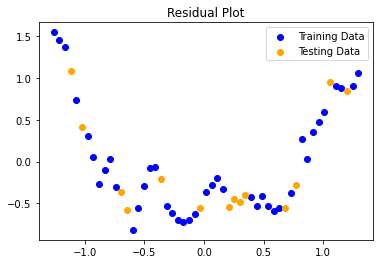

In [14]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
# plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [15]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
models = []

from sklearn.metrics import mean_squared_error

lr_predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, lr_predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "LinearRegression",
            "MSE": MSE,
            "R2":r2})

MSE: 0.3622796762223902, R2: 0.5782633204199743


In [16]:
#  LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01)
lasso.fit(X_train_scaled, y_train_scaled)

las_predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, las_predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "Lasso",
            "MSE": MSE,
            "R2":r2})

MSE: 0.36238312024693536, R2: 0.5781428992583763


In [17]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01)
elasticnet.fit(X_train_scaled, y_train_scaled)

ela_predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, ela_predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")
models.append({"model": "ElasticNet",
            "MSE": MSE,
            "R2":r2})

MSE: 0.36236057044187875, R2: 0.5781691499164561


In [18]:
a = pd.DataFrame(models)
a

,model,MSE,R2
0,LinearRegression,0.362280,0.578263
1,Lasso,0.362383,0.578143
2,ElasticNet,0.362361,0.578169


In [19]:
a[a["R2"]==a["R2"].max()]

,model,MSE,R2
0,LinearRegression,0.36228,0.578263


In [20]:
a[a["MSE"]==a["MSE"].min()]


,model,MSE,R2
0,LinearRegression,0.36228,0.578263


## Using LinearRegression

In [21]:
new_years = [2020, 2030, 2040, 2050]

In [22]:
year_df = pd.DataFrame(new_years, columns = ['years'])
year_df

,years
0,2020
1,2030
2,2040
3,2050


In [23]:
# Assign X (data) and y (target)
new_X = year_df["years"].values.reshape(-1, 1)

In [24]:
# Create a StandardScaler model for the new_X

new_X_scaled = X_scaler.transform(new_X)

In [25]:
# Prediction
energy_predictions = model.predict(new_X_scaled)

In [26]:
energy_predictions

array([[1.34070261],
       [1.81334928],
       [2.28599594],
       [2.75864261]])

In [27]:
y_new_inverse = y_scaler.inverse_transform(energy_predictions)
y_new_inverse

array([[78.55521769],
       [82.70852586],
       [86.86183402],
       [91.01514219]])

In [28]:
global_allenergy_prediction = pd.DataFrame(y_new_inverse, columns=["EU"])
global_allenergy_prediction

,EU
0,78.555218
1,82.708526
2,86.861834
3,91.015142


In [29]:
eu_allenergy = pd.concat([year_df, global_allenergy_prediction], axis=1)
eu_allenergy

,years,EU
0,2020,78.555218
1,2030,82.708526
2,2040,86.861834
3,2050,91.015142


In [30]:
eu_allenergy.to_csv('eu_allenergy', encoding='utf-8')